---

# Wikispeedia: What does X have to do with Y? You better find out!


Since the earliest records, humans have wandered across endless lands and walked thorugh mysterious paths, in an attempt to uncover the unexplored and find better conditions for their tribes. The rise of agriculture and the industrial era has, however, changed things, turning us into bare sedentary animals... until now! 

![](images/heComputer.gif)

[Wikispeedia](https://dlab.epfl.ch/wikispeedia/play/) is an easy and fun game: you are given two Wikipedia articles, and starting from the first article, your goal is to reach the second one exclusively by clicking links in the articles you encounter, effectively letting you explore your own paths across the vast Wikipedia network, for free! Your game data is collected by [The EPFL Data Science Lab](https://dlab.epfl.ch/), which helps us and them better understand some aspects of human behaviour 😉.

Using this data, we ask ourselves, are there patterns in the way players navigate the network, that make them more successful? That is, is there any optimal strategy that doesn't require extensive knowledge of the network?

Players are faced with multiple stimuli during the playing session, and players' decisions as well as their subsequent success may be influenced by them. For example, users might navigate the network through `semantic similarity` optimization, or they might just click the links found in `images` or `tables`, etc.

Do these particular features have any effect on players' success? Let's find out!


---


## Players as humans 
### Strategies and attitudes

Being the Wikispeedia game and **individual** and **timed game**, players responses to the challenge it serves are miscellaneous. 
Individuals may **consciously** come up with a **strategy** to tackle the task they are assigned to, or **unintentionally** manifest a **behavior** that could be observed by scrupulous data analysts, like us. 
The Wikispeedia game itself was designed to extrapolate information allowing the computation of semantic distance between real-world concepts, to be leveraged in intelligent applications. 
Less ambitiously, we’re interest in outlining players mutual attitudes and the likeliness these **lead** them to **succeed in the game**, potentially a causal relationship. 
Among the manifold performable strategies we hypothesised the following:
- clicking on hyperlinks showing up at the **top** of the article page;
- clicking on hyperlinks showing up in **image captions**;
- clicking hyperlinks that are **semantically related** to the current article;  
- clicking hyperlinks that are semantically related to the **target article**. 

_Look at the webpage below, isn’t your gaze naturally directed towards those velvet red petals?_
This is what we’re talking about. 

![](images/Aesthetics.png)

As “the Parthenon's facade” showing a marvellous  “interpretation of golden rectangles in its proportions” is judged to be aesthetically valuable by humans ability to discriminate at a sensory level, it is also true that **visual content attracts human attention** more than raw text. 

Additionally, picture yourself in a **competitive framework**, with a stopwatch in your left hand and your right trembling fingers on a mouse, determined to break down the shortest ever recorded Wikispeedia game and be remembered for eternity. 
Wouldn’t you click on **top-positioned hyperlinks** or would you parse the article in search for the best catch?

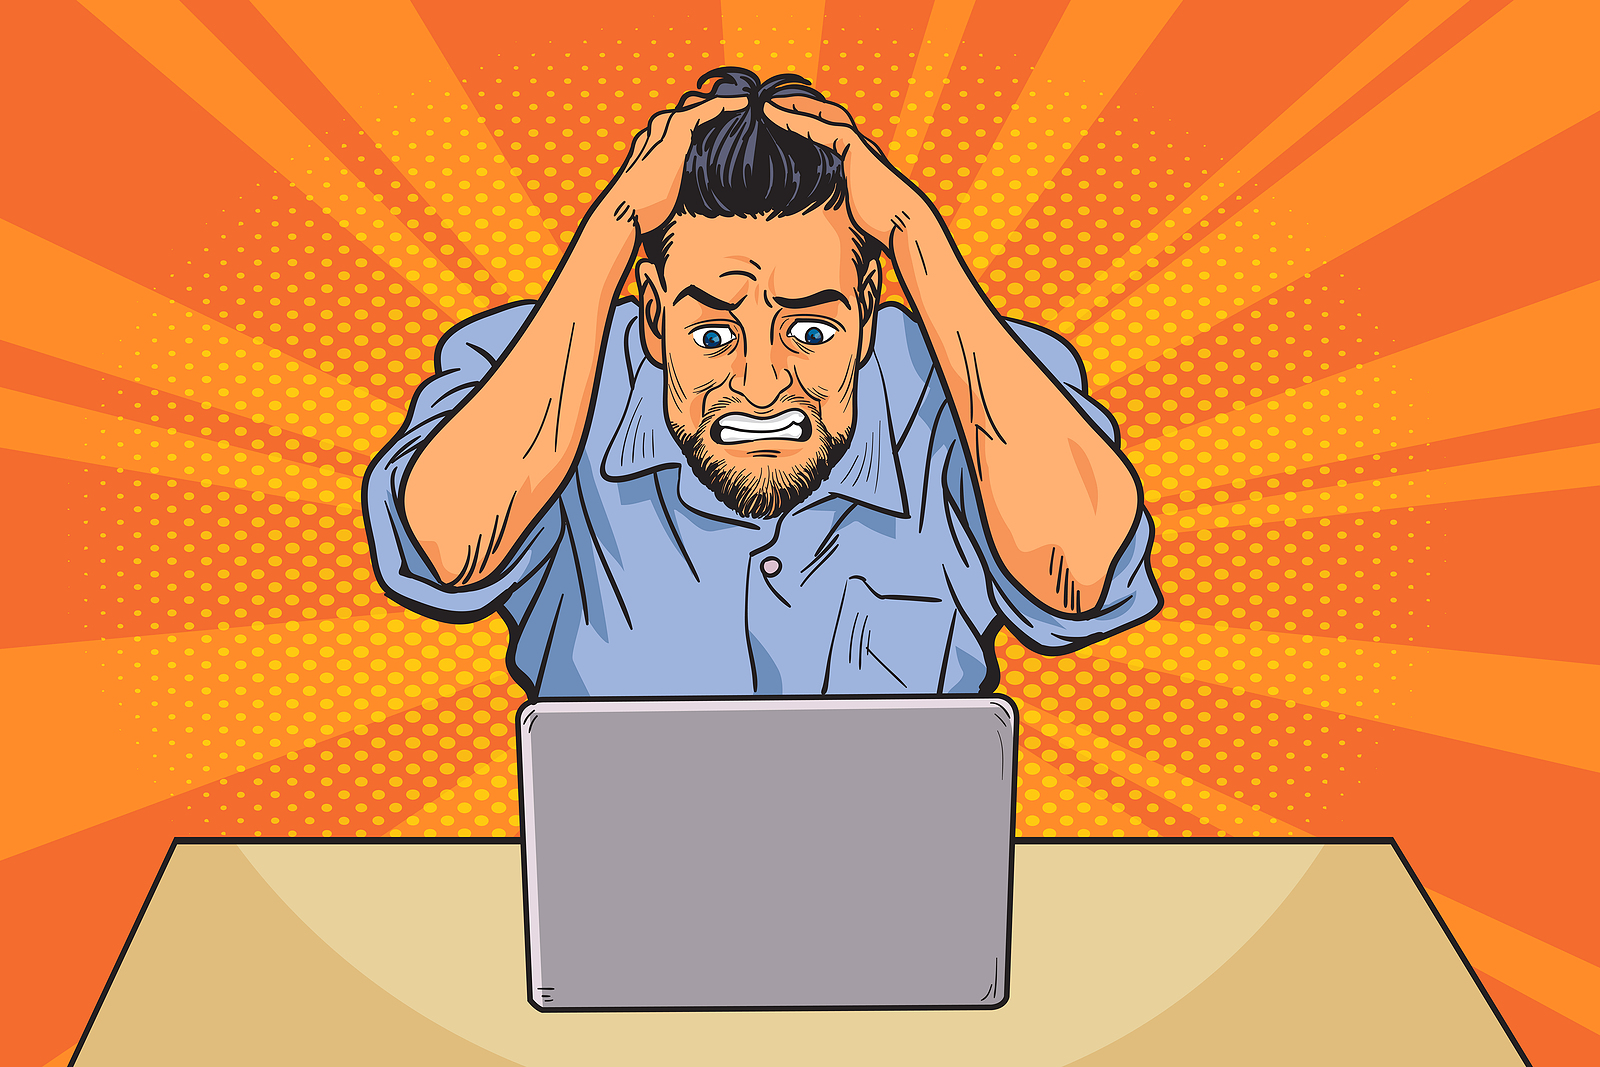

In [33]:
#| source: https://radionotas.com/2021/04/16/10-errores-comunes-de-un-locutor-de-radio/
#| fig-cap: In a competitive framework, players have the additional stress of finishing the game _fast_; information in an easily diggestible format, like images, provide an easy and quick shortcut to progress.

from IPython.display import Image
Image('images/stressed.jpg', width=400)

#### Indeed, this is the case, at least for the majority of players.

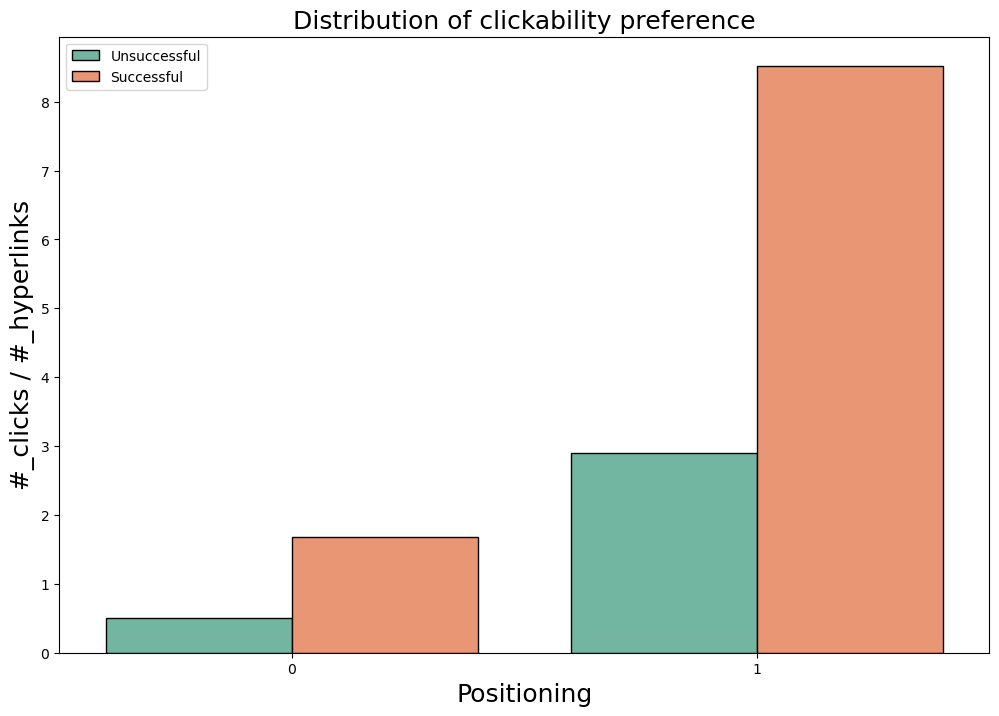

In [35]:
#| fig-cap: Players seem to be very attracted to links close to images (1 in the plot).

Image('images/Distribution_clickability_preference_img.png', width=500,height=600)

The graphs can be read as follows: the heights of the columns represent a measure of how trendy the target behavior is among players; the left-sided column, per behavior, is the distribution among unsuccessful players, while the right-sided is the one among successful players\*. 

It is evident that clicking hyperlinks showing up in **image captions** is a **trendy behavior** for Wikispeedia players, especially among the **successful**. The rate of successful players clicking on images’ captions is roughly 4 times the unsuccessful players one.

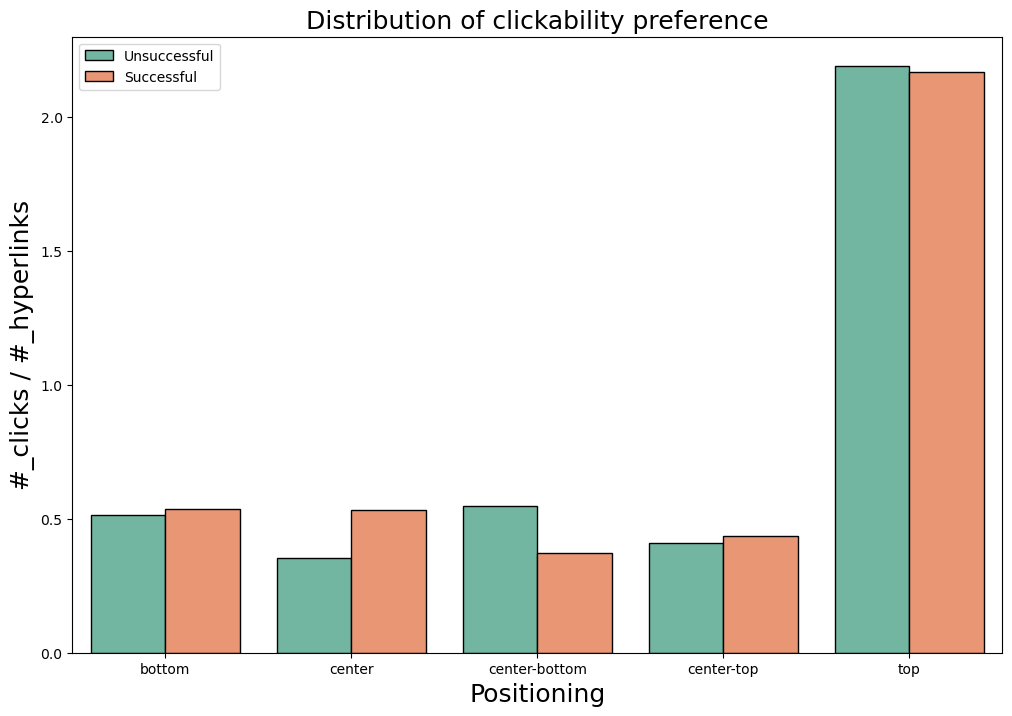

In [5]:
Image('images/Distribution_clickability_preference_pos.png', width=500,height=600)

Again, it is evident that clicking on hyperlinks showing up at the **top of an article** is largely trendier than clicking on hyperlinks elsewhere positioned in the article text (4 to 5 times more common). The gap between successful and unsuccesful players is not that large to show a pattern.

However these are just _distributions_, i.e. a **fair picture of reality**, they show trends, no conclusions can be driven still. <br>
\*for a better understading of the graph (e.g. magnitudes of the column heights, units of measurements, etc.) see the notebook project_adalyzers.ipynb. 

#### Eye-catcher hyperlinks: instinctual urge to be turned down or smart way to go?

In addition to this crispy question, we ask you, dear reader, to wait some time more for the statistical inference you're craving for, and dig a little deeper into human natural language structural traits.  

A little trickier to understand: **semantic similarity**. Semantic similarity is a metric that evaluates the distance between items on the basis of the **likeness of their meaning** or semantic content. Humans at play, challenged to reach a target article, whereof the only information they’re provided with is a word or phrase, display common sense knowledge. They would, in fact, look for semantic **relatedness** in clicking the hyperlinks.
Thinking of the **hypertextual Wikipedia graph** alone, it can be viewed as a primitive semantic **network**: articles represent the concepts and the hyperlinks are the means of connection between them.
Two articles can be more or less "semantically related" if, naivly, the two "overlap" well, with regard to the words present in them and the way they are ordered or used in context. 

An illustration of the structure of the Wikispeedia hypertextual graph is shown in the image below (a part of it). The path between the source article "mathematics" to the target article "Alan Touring" is pictured. The grey arrows connect nodes (i.e. hyperlinks) of a human path with length equal to 3, while the black arrows connect nodes of the shortest existing path between source and target articles, with length equal to 2. 

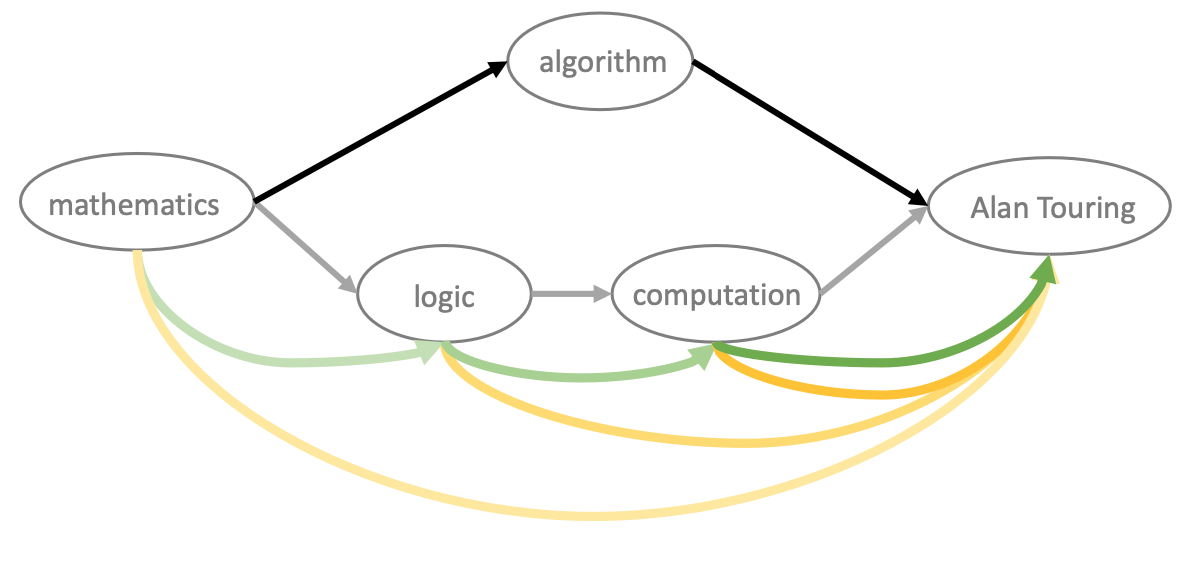

In [40]:
#| fig-cap: "There are many ways of solving a puzzle. The optimal (black) doesn't always make sense. A way for it to make sense is to click the article most similar to the current one (green path: sequential similarity increase), or click the article that is most similar to the target article (yellow path: target similarity increase). As shown by the intensity of the color, similarity increases in these paths as the player approaches the goal article."

Image("images/path.png", width=600, height=300)

#### Semantic similarity: the paths that 'make sense'.

An attitude it is reasonable to suppose players would perform, is to click on hyperlinks that are semantically closer and closer, along the human path, to the target article. The yellow arrows visualize these weighted conncetions, a.k.a. distances evaluated with the semantic similarity metric. 

A smarter way could be to click on articles linked by increasing similarity between every two neighbouring along the path. The green arrows visualize the latters. <br>

**"These paths make sense, however, is this really the way the games are played? Is this actually effective w.r.t. success?"**

Let us explore the data and answer to these questions. 

## A look into the collected data...

# JEFF add interesting visualizations/crispy distributions you got from the exploration of the data
#### maybe explain less naively the semantic similarity metric (optional)

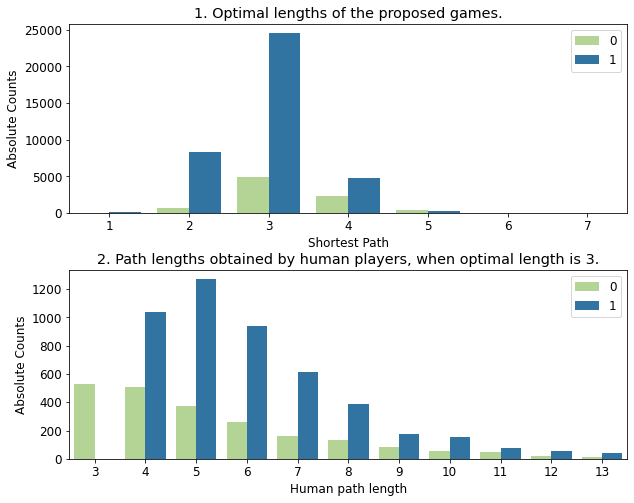

In [7]:
#| label: data-distribs
#| fig-cap: "How are the data distributed among successful and unsuccessful games? We show: (top) The distributions of optimal lengths of the proposed games, and (bottom) The distributions of path lengths obtained by humans."



# take a look at the shortest_path distributions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

final_df = pd.read_csv('processed/final_df_curv_feats.csv')


fig, ax = plt.subplots(2,1, 
                       figsize=(10,8), 
                       gridspec_kw={"hspace":0.3})
plt.rcParams["font.size"] = 12


sns.barplot(data=(final_df
                  .groupby(["shortest_path_length", 
                            "is_successful"])['path']
                  .count()
                  .reset_index()
                 ),
            y="path", 
            x="shortest_path_length", 
            hue="is_successful",
            ax=ax[0], 
            palette=["#b2df8a", "#1f78b4"])


ax[0].set_ylabel('Absolute Counts'); 
ax[0].set_xlabel('Shortest Path');
ax[0].set_title("1. Optimal lengths of the proposed games.")
#Count of human paths, stratified by shortest possible path")

ax[0].legend(loc=1)
ax[0].set_ylabel('Absolute Counts') 
ax[0].set_xlabel('Shortest Path')


sns.barplot(data=(final_df.query("shortest_path_length==4")
                  .groupby(["human_path_length", 
                            "is_successful"])['path']
                  .count()
                  .reset_index()
                 ),
            y="path", 
            x="human_path_length", 
            hue="is_successful",
            ax=ax[1], 
            palette=["#b2df8a", "#1f78b4"])

ax[1].set_xlim(-0.5,10.5)

ax[1].set_ylabel('Absolute Counts')
ax[1].set_xlabel('Human path length')
ax[1].set_title("2. Path lengths obtained by human players, when optimal length is 4.")
# Count of human path lengths, with shortest possible path = 3");

ax[1].legend(loc=1);

The graphs reveal some interesting features of the **Wikispeedia hypertextual graph** and the **humans navigability network**. 
The first plot shows the distribution of the shortest path distance of the tasks assigned to players.  
The second plot shows the length of the actual paths taken by humans, on the subset with shortest path distance equal to 4.
Given that the shortest path distance is taken as a proxy to game difficulty (see Section _A matching study_):
- the distribution of the difficulty of games peaks at length equal to 3 and ranges from 2 to 5; 
- there exist hyperlinks which are not connected to any other;
- as difficulty increases, the class unbalance decreases; 
- the distribution of successful human paths (with fixed shortest path distance == 4) spreads to a wide range of values, non monotously. 
- the distribution of unsuccessful paths (with fixed shortest path distance == 4) is severely skewed to the left and peaks at 3, meaning that in such paths, players give up before even having a chance to win. 

More _down-to-Earth_: the **distribution of optimal path lengths** and the **distribution of human path lengths** are **uneven** and significantly **vary for the populations** of successful vs unsuccessful players. <br>
These conclusions bring us to look for features of the games possibly affecting players performances (a.k.a. covariates), leading them to behave so inhomogeneously. 

## A closer look into the collected data: hunt for covariates.

# ANDRES add fun facts about the network features, visualizations, -> motivate the Matching 

### Graph-theoretical features

To characterize a path, we can describe each clicked link (i.e. each piece of the path, a.k.a. node of the graph), in the context of the Wikispeedia network. What do we mean by this? 
Consider the articles "_United States of America_" and "_Bernard Hinault_". The first one is one of most influential country on the world: intuitively it has a lot of other articles pointing to it, and also links to a lot other articles.
The second is... well, less known. Way less known. Our friend here is, although one of the greatest cyclist in history, part of a very narrow context, in the context of the Wikispeedia network. 

If we manage to reach "_United States of America_", we have big chances of reaching any other article, as it's well connected, while if we ever reach "_Bernard Hinault_", the paths we take may be longer.

To put this into numbers, we quantify the **edge curvature** of each edge (clickable link in an article) in the path. This quantifies the ammount of "flow potential" of a node (article). If an article has many ways in and many ways out, then its curvature is very negative, however if the ways in (or the ways out) are too few, we might have encountered a bottle neck, with a curvature closer to 0.

<br>
<font size='4'>
\begin{align*}
F(_\rightarrow e_\rightarrow) &= 2 - in(i) - out(j)
\end{align*}
</font>
<br>

All the features listed make the Wikispeedia hypertextual graph clumpy and the addressed comparisons above unfair (we did it on purpose to show you that when your granny warned you not to judge people by their appearance, she was right!). 

In statystical terms: these are **observed covariates** that we will leverage to remove the **confounders** that may affect the outcome of the logistic regression analysis we're aiming at conducting in order to find a potential correlation between the strategies/attitudes performed by players and their success.

To state it more clearly, the shortest path distance between the source and target article in the Wikispeedia hyperlinks graph can be viewed as a measure of the **“difficulty”** of the randomly assigned task (source and target articles), affecting both the players' successfulness and the strategy adopted to address it (a.k.a. confounder); this is a _static feature_. Furthermore, depending on the users' choices, the task can become harder or easier as the game develops (_dynamic feature_): this trait can be captured by the, path dependent, features hyperlinks' in- and out- degrees.

As we wish to compare only similar paths, these features will be exploited to restrict the inquiry on paths with a certain degree of **"similarity"** between themselves. 

# A matching study 

The methodology chosen for the data processing step is to perform a **matched analysis** with the final objective to test if specific **players' game strategies lead to success** in the Wikispeedia game. To this end a **logistic regression** is conducted with **players' success as the outcome** and the following **strategies as predictors**:

1. Positioning of the clicked hyperlinks;
2. Clicking hyperlinks in image captions;
3. Clicking articles with the following semantic similarity patterns:
   - increasing semantic similarity along the path between articles and the target article;
   - increasing semantic similarity along the path between two sequentially clicked articles.

In order to remove the aforementioned confounders, the dataset is filtered and the matching is performed accordingly with the assumptions made. Players are matched on same shortest path distance of the assigned task, and maximum **propensity score**. The propensity scores are obtained by calculating the **predicted outcomes of a logistic regression** with the outcome being the _probability of treatment_ and the predictors being _features of the human paths_.
The **treated subject** being the user performing a specific strategy (e.g. clicking more frequently than the average on hyperlinks showing up in images’ captions) and the **controlled subject** being the user NOT performing the strategy.

The players tested are now on the **same starting point when choosing what strategy to adopt**.

The analysis challenge can be reformulated as follows: _**“being assigned an equally difficult task and being equally free to perform a specific strategy, are players more successful if they adopt that specific strategy?”**_

# Finally, let's test if there's a programmatic way to win this game!!

In [64]:
def highlight_rows(row):
    value = row.loc["p-value"]
    if value > 0.05:
        color = '#FFB3BA' # Red
    elif value < 0.05:
        color = '#BAFFC9' # Green
        
    return ['background-color: {}'.format(color) for r in row]

results_df = (pd.read_csv("images/results_matching.csv", index_col=0)
              .loc[["Coefficient", "Coefficient p-value"]]
              .T)

results_df.columns = ["Coefficient", "p-value"]

(results_df
 .sort_values(by="p-value")
 .style
 .apply(highlight_rows, axis=1)
)

,Coefficient,p-value
target_strictly_increasing,0.331702,0.000369
used_bottom,-0.480309,0.029248
seq_strictly_increasing,0.185502,0.335804
used_top,-0.187462,0.358632
used_center_bottom,-0.107463,0.604242
used_count_images,-0.016091,0.876319


We test 6 different possible strategies, and we find that **two** of them have some effect in the outcome, namely `clicking links in the bottom of the page`, and `clicking to increase similarity to target` (as p-values for both show there's a significant difference between populations). They have, however, opposite effects: the former has a negative coefficient, while the latter has a positive one, implying that clicking links in the bottom of the page has a significantly negative effect on the outcome of the game. **SO DON'T DO THIS 😭**.

Additionally, non surprisingly images play no role in user's success.

The latter makes a lot of sense, though. This result also provides good evidence that there's no shortcut to success in this game: If you wanna win in wikispeedia, you will (un)fortunately have to think hard!